In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
from scipy.optimize import differential_evolution, NonlinearConstraint, Bounds, minimize, fmin, rosen

In [3]:
# Generate universe variables
x_in = np.arange(0, np.pi, 0.01)
y_out = np.arange(0, 1, 0.01)


#well this function takes a vector/list of variables for mf boundies with input & spits out a number for sin()
def sin(X, x):
    x_lo = fuzz.gaussmf(x_in, X[0], X[1])
    x_md = fuzz.gaussmf(x_in, X[2], X[3])
    x_hi = fuzz.gaussmf(x_in, X[4], X[5])
   
    y_lo = fuzz.gaussmf(y_out, X[6], X[7])
    y_hi = fuzz.gaussmf(y_out, X[8], X[9])
    
    x_le_lo = fuzz.interp_membership(x_in, x_lo, x)
    x_le_md = fuzz.interp_membership(x_in, x_md, x)
    x_le_hi = fuzz.interp_membership(x_in, x_hi, x)

    #rule1: if x == lo -> y = lo
    y_act_lo1 = np.fmax(np.fmin(x_le_lo, y_lo), 1-x_le_lo)
    
    #rule2: if x == md -> y = hi
    y_act_hi = np.fmax(np.fmin(x_le_md, y_hi), 1-x_le_md)
    
    #rule3: if x == hi -> y = lo
    y_act_lo2 = np.fmax(np.fmin(x_le_hi, y_lo), 1-x_le_hi)
    
    y_act_lo = np.fmax(y_act_lo1, y_act_lo2)
    
    agg = np.fmin(y_act_lo, y_act_hi)
    
    if agg.sum() == 0:
        return 1/2

    y = fuzz.defuzz(y_out, agg, 'centroid')
    
    return y

In [4]:
sin([0, 1, 2, 1, 3, 1, 0, 1, 1, 1], 2)

0.5196379335065262

In [5]:
np.sin(2)

0.9092974268256817

In [6]:
def Error1(X):
    p4 = np.pi/4
    v = np.array([np.sin(p4)-sin(X,p4), np.sin(2*p4)-sin(X,2*p4), np.sin(3*p4)-sin(X,3*p4)])
    return np.linalg.norm(v, 2)

In [7]:
Error1([0, 1, 2, 1, 3, 1, 0, 1, 1, 1])

0.5711024979029921

In [8]:
#constrains & Bounds
bounds = [(0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), (0, 1), (0, 1), (0, 1), (0, 1)]


In [9]:
xinitial = [0, 1, 2, 1, 3, 1, 0, 1, 1, 1]
result1 = differential_evolution(Error1, bounds, x0 = xinitial)
result1.x, result1.fun

/home/garfield/anaconda3/lib/python3.8/site-packages/skfuzzy/membership/generatemf.py:85: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-((x - mean)**2.) / (2 * sigma**2.))


(array([2.59708625, 1.35032342, 1.57060465, 3.14159265, 1.32710933,
        2.86185543, 0.80707636, 0.99507764, 0.98375129, 0.0155335 ]),
 0.025504427340786055)

In [10]:
sin(result1.x, 2)

0.8450598190446114

In [11]:
np.sin(2)

0.9092974268256817

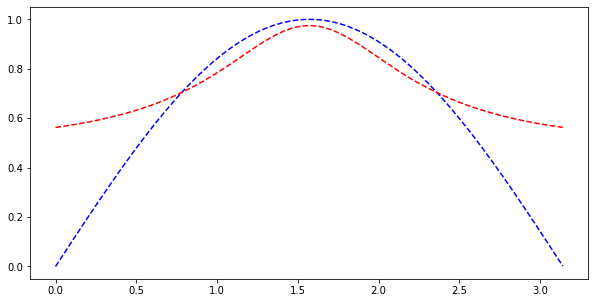

In [12]:
fig, ax0 = plt.subplots(figsize=(10, 5))

y_sin = np.sin(x_in)
ax0.plot(x_in, y_sin, 'b', linewidth=1.5, linestyle='--', )

y_f_sin = np.array([])
for i in x_in:
    #print(i, sin(result1.x, i))
    y_f_sin = np.append(y_f_sin, sin(result1.x, i))
    
ax0.plot(x_in, y_f_sin, 'r', linewidth=1.5, linestyle='--', )
plt.show()

In [28]:
def Error2(X):
    p4 = np.pi/4
    v = np.array([np.sin(p4/2)-sin(X,p4/2), np.sin(p4)-sin(X,p4), np.sin(2*p4)-sin(X,2*p4), np.sin(3*p4)-sin(X,3*p4), np.sin(7*p4/2)-sin(X,7*p4/2)])
    return np.linalg.norm(v, 2)

In [29]:
result2 = differential_evolution(Error2, bounds, x0 = result1.x)
result2.x, result2.fun

(array([0.35472548, 0.11784059, 1.4908592 , 1.54325946, 0.79812529,
        2.55051724, 0.26799423, 0.19583591, 0.96392339, 0.04650514]),
 0.19633772353093054)

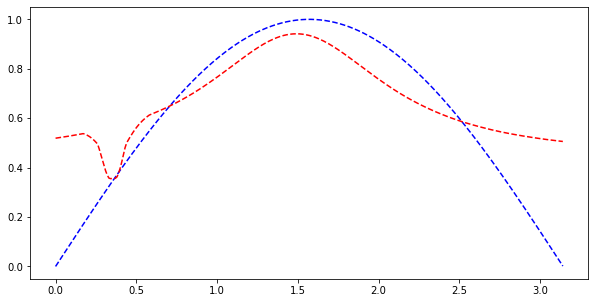

In [30]:
fig, ax0 = plt.subplots(figsize=(10, 5))

y_sin = np.sin(x_in)
ax0.plot(x_in, y_sin, 'b', linewidth=1.5, linestyle='--', )

y_f_sin = np.array([])
for i in x_in:
    #print(i, sin(result1.x, i))
    y_f_sin = np.append(y_f_sin, sin(result2.x, i))
    
ax0.plot(x_in, y_f_sin, 'r', linewidth=1.5, linestyle='--', )
plt.show()

In [32]:
def Error3(X):
    p4 = np.pi/4
    v = np.array([np.sin(0)-sin(X,0),np.sin(p4/2)-sin(X,p4/2), np.sin(p4)-sin(X,p4), np.sin(2*p4)-sin(X,2*p4),
                  np.sin(3*p4)-sin(X,3*p4), np.sin(7*p4/2)-sin(X,7*p4/2), np.sin(np.pi)-sin(X,np.pi)])
    return np.linalg.norm(v, 2)

In [33]:
result3 = differential_evolution(Error3, bounds, x0 = result2.x)
result3.x, result3.fun

/home/garfield/anaconda3/lib/python3.8/site-packages/skfuzzy/membership/generatemf.py:85: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-((x - mean)**2.) / (2 * sigma**2.))
/home/garfield/anaconda3/lib/python3.8/site-packages/skfuzzy/membership/generatemf.py:85: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(-((x - mean)**2.) / (2 * sigma**2.))


(array([1.40125338e-03, 5.46303746e-01, 1.47692132e+00, 1.51367752e+00,
        8.48504203e-03, 2.97541860e+00, 0.00000000e+00, 0.00000000e+00,
        9.60187431e-01, 5.34438975e-02]),
 0.5462794775406037)

/home/garfield/anaconda3/lib/python3.8/site-packages/skfuzzy/membership/generatemf.py:85: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-((x - mean)**2.) / (2 * sigma**2.))
/home/garfield/anaconda3/lib/python3.8/site-packages/skfuzzy/membership/generatemf.py:85: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(-((x - mean)**2.) / (2 * sigma**2.))


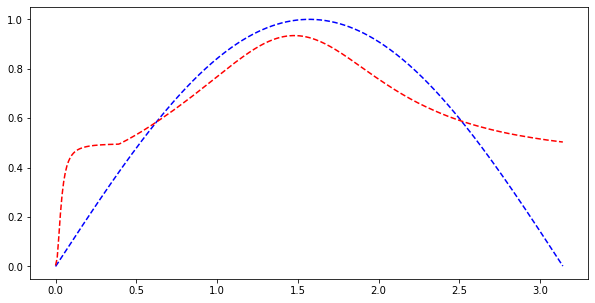

In [34]:
fig, ax0 = plt.subplots(figsize=(10, 5))

y_sin = np.sin(x_in)
ax0.plot(x_in, y_sin, 'b', linewidth=1.5, linestyle='--', )

y_f_sin = np.array([])
for i in x_in:
    #print(i, sin(result1.x, i))
    y_f_sin = np.append(y_f_sin, sin(result3.x, i))
    
ax0.plot(x_in, y_f_sin, 'r', linewidth=1.5, linestyle='--', )
plt.show()

In [41]:
def Error4(X):
    p2 = np.pi/2
    p3 = np.pi/3
    p4 = np.pi/4
    p8 = np.pi/8
    v = np.array([np.sin(1e-2)-sin(X,1e-2),np.sin(p8)-sin(X,p8), np.sin(p4)-sin(X,p4), np.sin(p3)-sin(X,p3), np.sin(p2)-sin(X,p2),
        np.sin(2*p3)-sin(X,2*p3),np.sin(3*p4)-sin(X,3*p4), np.sin(7*p8)-sin(X,7*p8), np.sin(np.pi-1e-2)-sin(X,np.pi-1e-2)])
    return np.linalg.norm(v, 2)

In [42]:
result4 = differential_evolution(Error4, bounds, x0 = result3.x)
result4.x, result4.fun

/home/garfield/anaconda3/lib/python3.8/site-packages/skfuzzy/membership/generatemf.py:85: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-((x - mean)**2.) / (2 * sigma**2.))
/home/garfield/anaconda3/lib/python3.8/site-packages/skfuzzy/membership/generatemf.py:85: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(-((x - mean)**2.) / (2 * sigma**2.))


(array([0.02082487, 0.46952832, 1.49408126, 1.3905729 , 0.08067921,
        3.02564192, 0.01613745, 0.01460532, 0.94090813, 0.08428672]),
 0.5592477496222608)

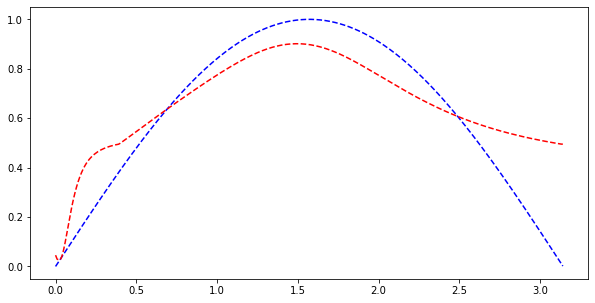

In [43]:
fig, ax0 = plt.subplots(figsize=(10, 5))

y_sin = np.sin(x_in)
ax0.plot(x_in, y_sin, 'b', linewidth=1.5, linestyle='--', )

y_f_sin = np.array([])
for i in x_in:
    #print(i, sin(result1.x, i))
    y_f_sin = np.append(y_f_sin, sin(result4.x, i))
    
ax0.plot(x_in, y_f_sin, 'r', linewidth=1.5, linestyle='--', )
plt.show()

In [44]:
def Error5(X):
    p2 = np.pi/2
    p3 = np.pi/3
    p4 = np.pi/4
    p8 = np.pi/8
    p15 = np.pi/15
    v = np.array([np.sin(1e-2)-sin(X,1e-2), np.sin(p15)-sin(X,p15), np.sin(p8)-sin(X,p8), np.sin(p4)-sin(X,p4), np.sin(p3)-sin(X,p3), np.sin(p2)-sin(X,p2),
        np.sin(2*p3)-sin(X,2*p3),np.sin(3*p4)-sin(X,3*p4), np.sin(7*p8)-sin(X,7*p8), np.sin(14*p15)-sin(X,14*p15), np.sin(np.pi-1e-2)-sin(X,np.pi-1e-2)])
    return np.linalg.norm(v, 2)

In [45]:
result5 = differential_evolution(Error5, bounds, x0 = result4.x)
result5.x, result5.fun

(array([0.05095337, 0.61835309, 1.46008462, 1.25025799, 0.02996913,
        2.53970952, 0.04111785, 0.05281121, 0.92669256, 0.09868333]),
 0.6385498212425152)

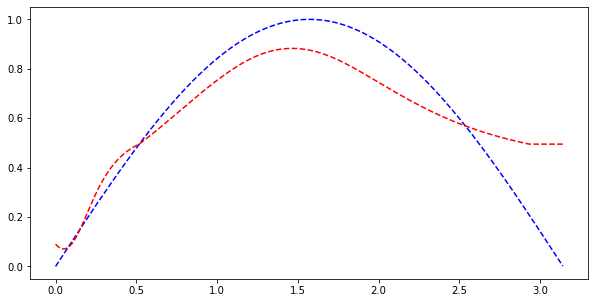

In [46]:
fig, ax0 = plt.subplots(figsize=(10, 5))

y_sin = np.sin(x_in)
ax0.plot(x_in, y_sin, 'b', linewidth=1.5, linestyle='--', )

y_f_sin = np.array([])
for i in x_in:
    #print(i, sin(result1.x, i))
    y_f_sin = np.append(y_f_sin, sin(result5.x, i))
    
ax0.plot(x_in, y_f_sin, 'r', linewidth=1.5, linestyle='--', )
plt.show()